In [5]:
! pip install weightwatcher  transformers 

In [6]:
import os
os.chdir("../pytorch")

In [2]:
import sys
from pathlib import Path
from time import time

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader, Dataset

from weightwatcher import WeightWatcher 

from matplotlib import pyplot as plt

from utils import last_epoch
from trainer import Trainer, PreLoader
from pildataset import PILDataSet
from models import MLP2

In [3]:
#NOTE: changing this value requires resetting the notebook kernel.
DETERMINISTIC = True

if DETERMINISTIC:
    import random
    import os

    os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

    torch.use_deterministic_algorithms(True)
    def reset_random_seeds(seed_value=1):
        os.environ['PYTHONHASHSEED']=str(seed_value)
        torch.manual_seed(0)
        np.random.seed(seed_value)
        random.seed(seed_value)

    reset_random_seeds()
else:
    reset_random_seeds = lambda: None

In [22]:
TRAIN = PILDataSet(True,  DS="MNIST")
TEST  = PILDataSet(False, DS="MNIST")
loader = PreLoader("MNIST", TRAIN, TEST, batch_size=16)

print(f"DETERMINISTIC set to {DETERMINISTIC}")

m = MLP2(widths=(300, 100), H=28, W=28, C=1)
t = Trainer(m)

reset_random_seeds()
# t.load(0, 0, "SETOL/TEST")
t.train_loop("SETOL/TEST", 0, 5, loader, LR=[0.01, 0, 0], loss="CCE")
print("\n")

t.load(0, 0, "SETOL/TEST")
reset_random_seeds()
t.train_loop("SETOL/TEST", 0, 5, loader, LR=[0.01, 0, 0], loss="CCE")
print("\n")

t.load(0, 0, "SETOL/TEST")
reset_random_seeds()
t.train_loop("SETOL/TEST", 1, 5, loader, LR=[0, 0.01, 0], loss="CCE")

t.load(0, 0, "SETOL/TEST")
reset_random_seeds()
t.train_loop("SETOL/TEST", 1, 5, loader, LR=[0, 0.01, 0], loss="CCE")

SETOL/TEST run 0 epoch 1 loss 0.2672 train accuracy 0.9244 test accuracy 0.9508 11.62 seconds	 alpha 1 2.551	 alpha 2 4.946
SETOL/TEST run 0 epoch 2 loss 0.1451 train accuracy 0.9591 test accuracy 0.9617 11.57 seconds	 alpha 1 2.317	 alpha 2 4.946
SETOL/TEST run 0 epoch 3 loss 0.1146 train accuracy 0.9682 test accuracy 0.9666 11.60 seconds	 alpha 1 2.230	 alpha 2 4.946
SETOL/TEST run 0 epoch 4 loss 0.0955 train accuracy 0.9742 test accuracy 0.9694 11.62 seconds	 alpha 1 2.139	 alpha 2 4.946
SETOL/TEST run 0 epoch 5 loss 0.0833 train accuracy 0.9780 test accuracy 0.9708 11.65 seconds	 alpha 1 2.074	 alpha 2 4.946


SETOL/TEST run 0 epoch 1 loss 0.2630 train accuracy 0.9261 test accuracy 0.9506 11.56 seconds	 alpha 1 2.595	 alpha 2 4.946
SETOL/TEST run 0 epoch 2 loss 0.1428 train accuracy 0.9597 test accuracy 0.9615 11.61 seconds	 alpha 1 2.293	 alpha 2 4.946
SETOL/TEST run 0 epoch 3 loss 0.1122 train accuracy 0.9687 test accuracy 0.9684 11.59 seconds	 alpha 1 2.174	 alpha 2 4.946
SETOL/

In [4]:
print(f"{'model name'.ljust(36)} run   #  epochs") 
print(''.join(['_'] * 80))
for OPT in ["SGD", "ADAM"]:
    for layer in ["layer0", "layer0_WHITENED", "layer1", "layer1_WHITENED", "all"]:
        for run in range(6):
            model_name = f"SETOL/MNIST/{OPT}/{layer}"
            print(f"{model_name.ljust(36)} run {run} ", last_epoch(run, model_name))

model name                           run   #  epochs
________________________________________________________________________________
SETOL/MNIST/SGD/layer0               run 0  136
SETOL/MNIST/SGD/layer0               run 1  133
SETOL/MNIST/SGD/layer0               run 2  131
SETOL/MNIST/SGD/layer0               run 3  133
SETOL/MNIST/SGD/layer0               run 4  136
SETOL/MNIST/SGD/layer0               run 5  136
SETOL/MNIST/SGD/layer0_WHITENED      run 0  184
SETOL/MNIST/SGD/layer0_WHITENED      run 1  206
SETOL/MNIST/SGD/layer0_WHITENED      run 2  203
SETOL/MNIST/SGD/layer0_WHITENED      run 3  206
SETOL/MNIST/SGD/layer0_WHITENED      run 4  202
SETOL/MNIST/SGD/layer0_WHITENED      run 5  204
SETOL/MNIST/SGD/layer1               run 0  426
SETOL/MNIST/SGD/layer1               run 1  374
SETOL/MNIST/SGD/layer1               run 2  372
SETOL/MNIST/SGD/layer1               run 3  425
SETOL/MNIST/SGD/layer1               run 4  329
SETOL/MNIST/SGD/layer1               run 5  402
SE

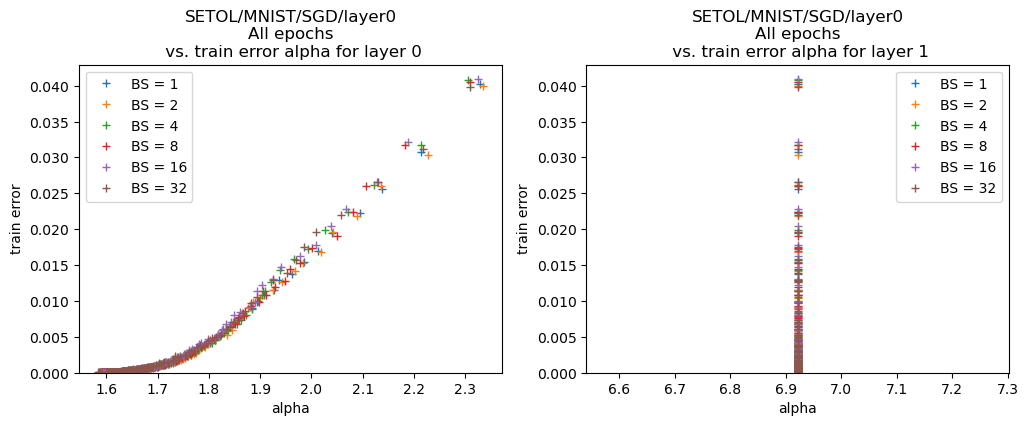

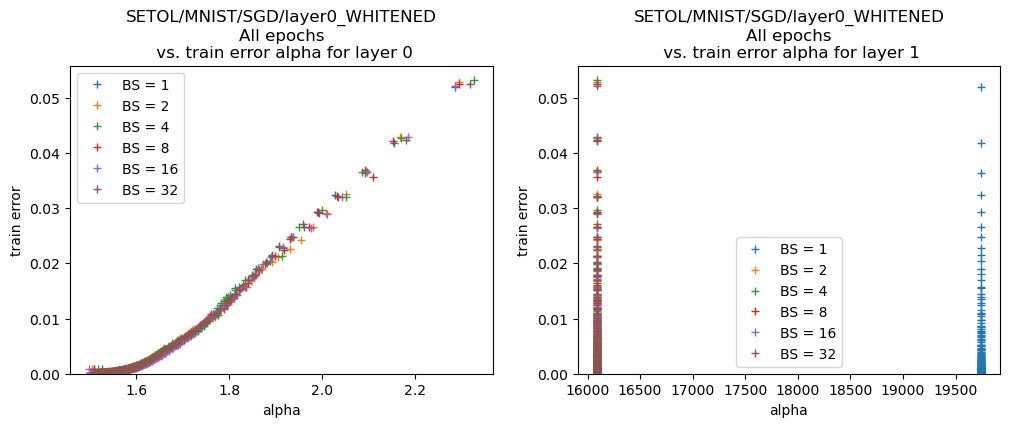

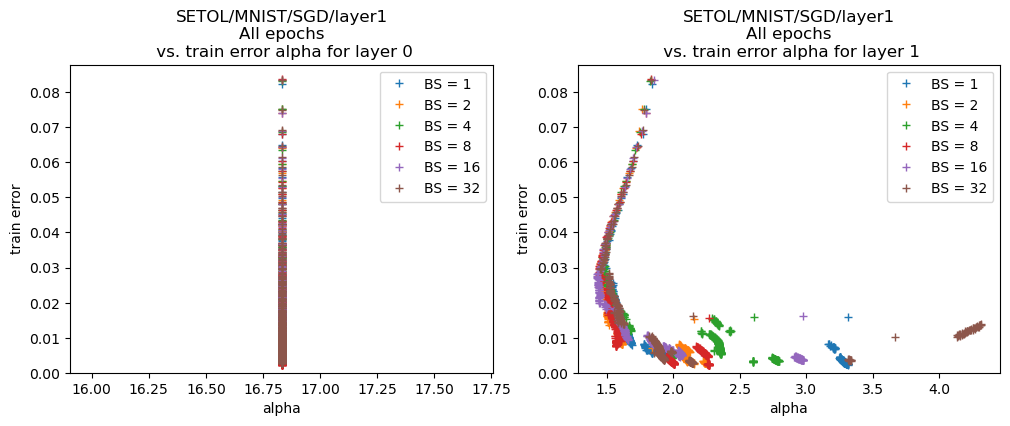

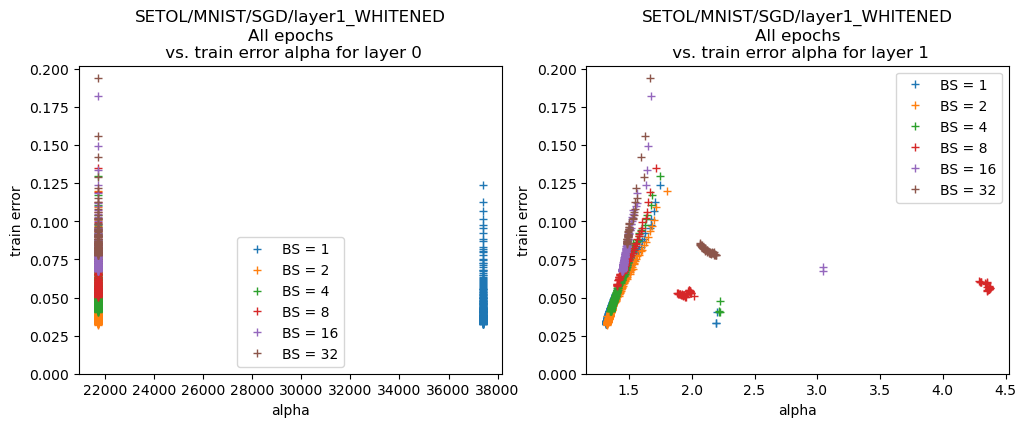

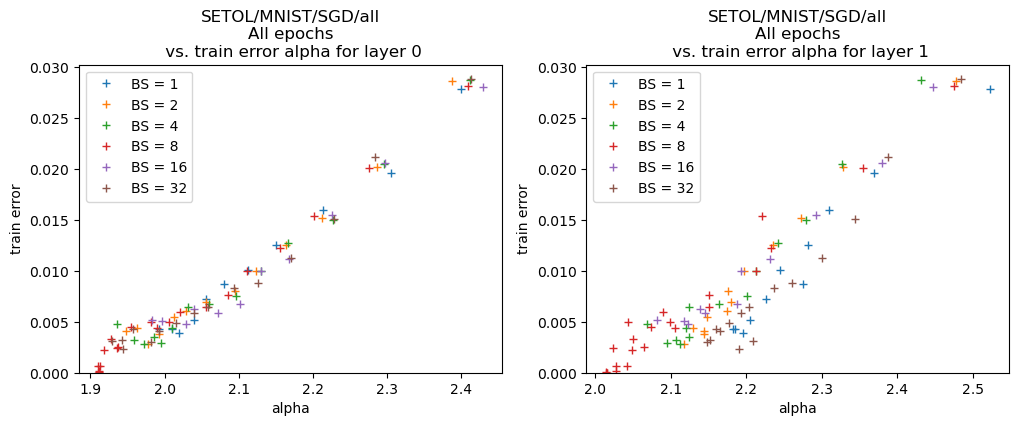

In [10]:
from plot_utils import plot_loss

ALL_BS = [1,2,4,8,16,32]
run_name = lambda r: f"BS = {ALL_BS[r]}"
WW_metric = "alpha"
opt = "SGD"
DS = "MNIST"

TRAIN = True
LOSS = False

plot_loss(f"SETOL/{DS}/{opt}/layer0",          range(6), run_name, [0, 1], WW_metric=WW_metric, TRAIN=TRAIN, LOSS=LOSS)
plot_loss(f"SETOL/{DS}/{opt}/layer0_WHITENED", range(6), run_name, [0, 1], WW_metric=WW_metric, TRAIN=TRAIN, LOSS=LOSS)
plot_loss(f"SETOL/{DS}/{opt}/layer1",          range(6), run_name, [0, 1], WW_metric=WW_metric, TRAIN=TRAIN, LOSS=LOSS)
plot_loss(f"SETOL/{DS}/{opt}/layer1_WHITENED", range(6), run_name, [0, 1], WW_metric=WW_metric, TRAIN=TRAIN, LOSS=LOSS)
plot_loss(f"SETOL/{DS}/{opt}/all",             range(6), run_name, [0, 1], WW_metric=WW_metric, TRAIN=TRAIN, LOSS=LOSS)

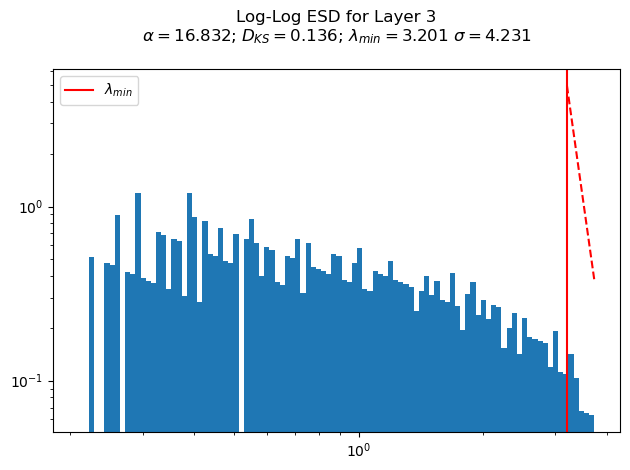

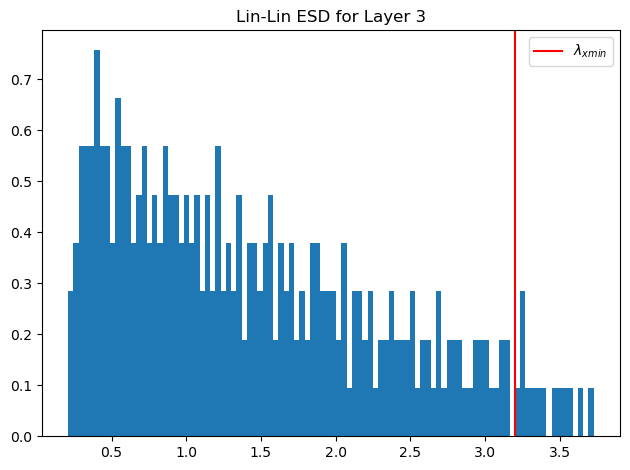

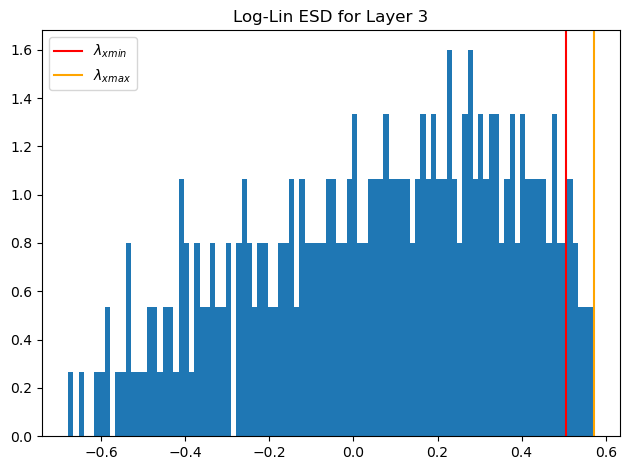

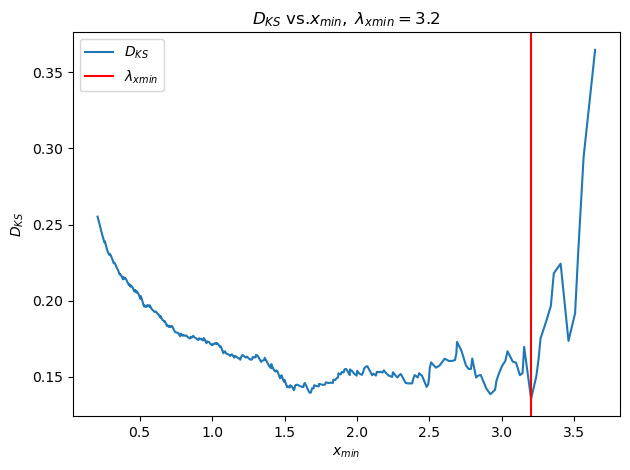

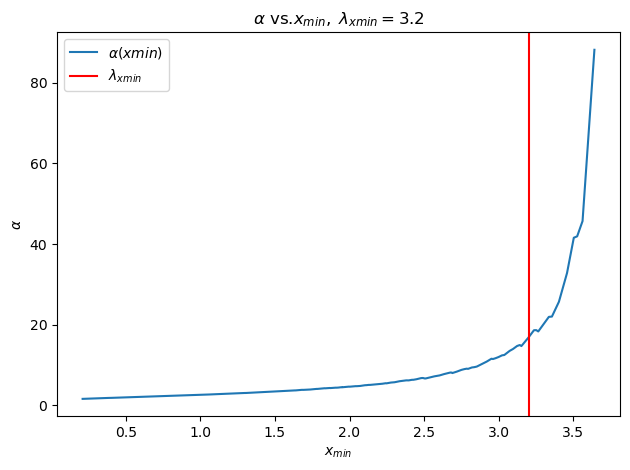

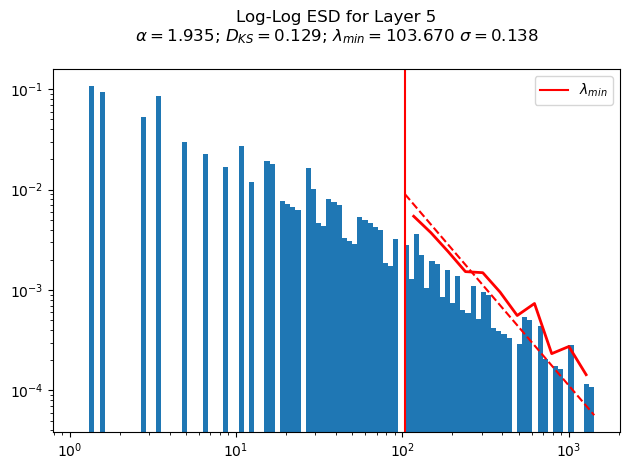

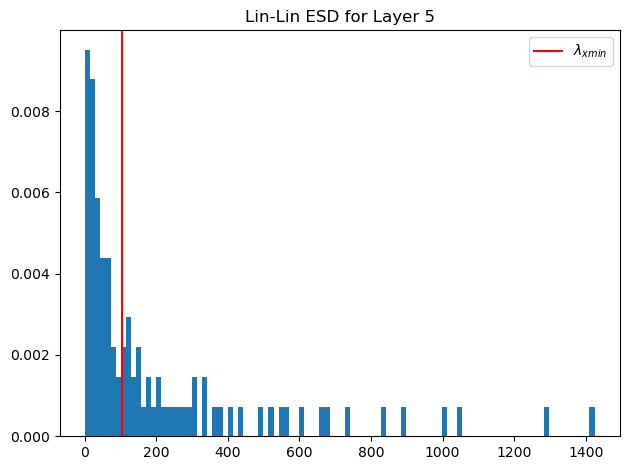

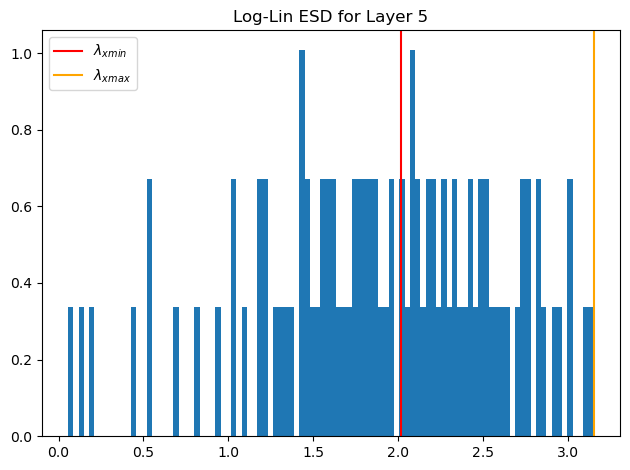

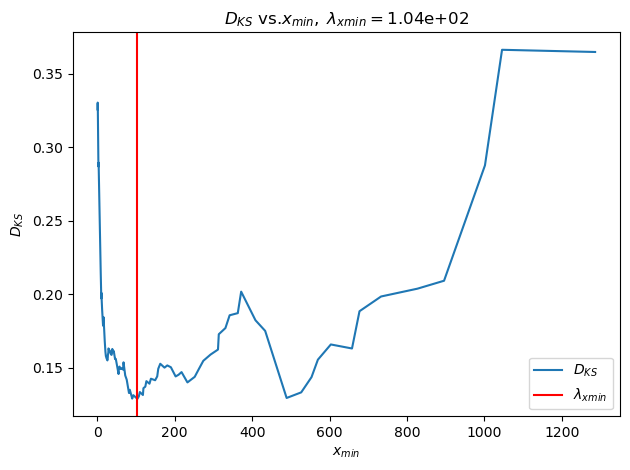

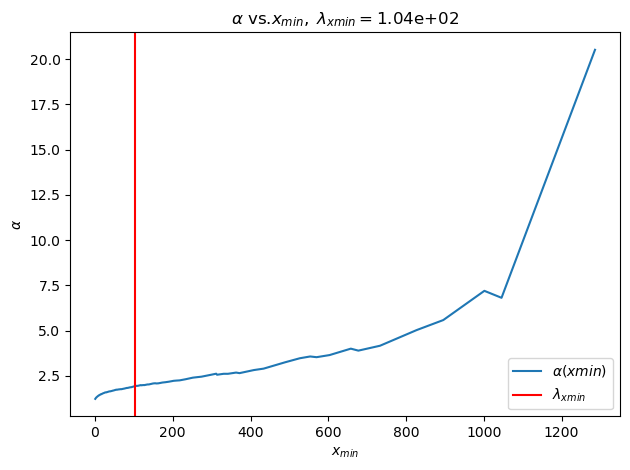

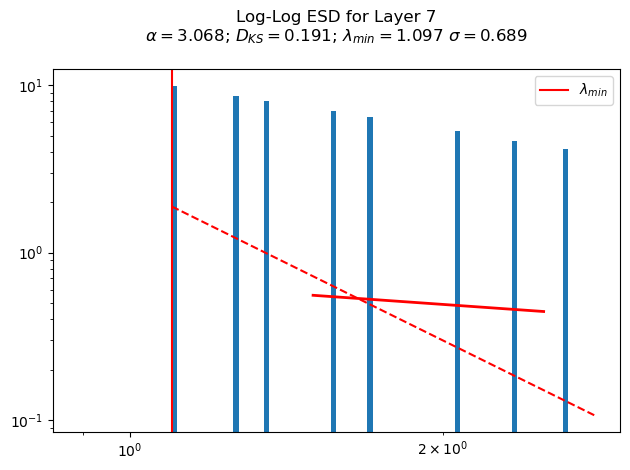

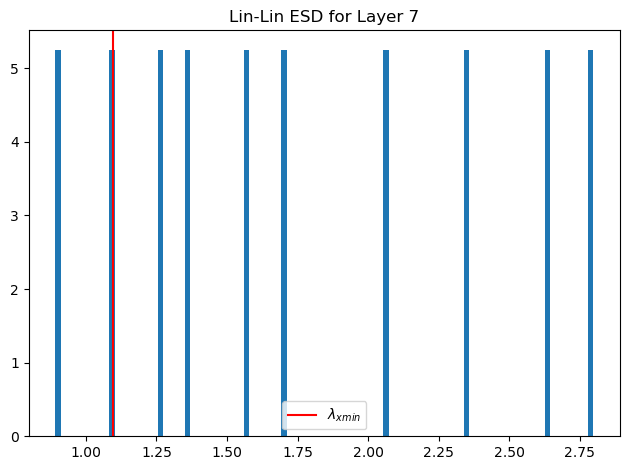

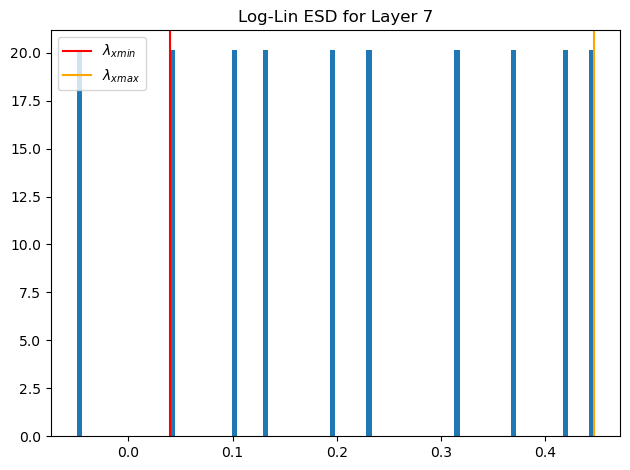

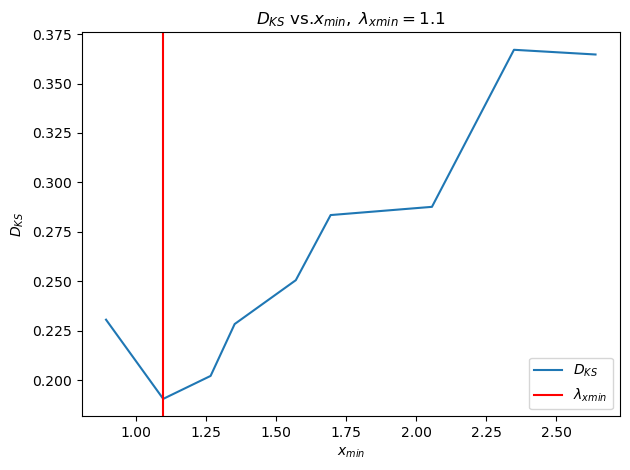

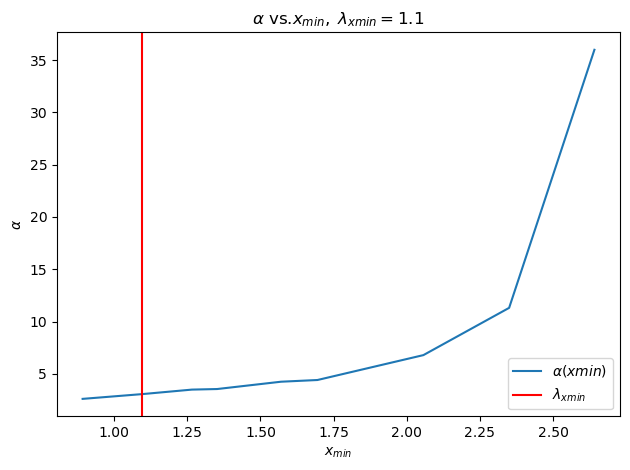

<Figure size 640x480 with 0 Axes>

In [129]:
m = MLP2(widths=(300, 100), H=28, W=28, C=1)
t = Trainer(m)
t.load(0, 300, f"SETOL/{DS}/{opt}/layer1")

watcher = WeightWatcher(m)
details = watcher.analyze(plot=True)

In [40]:
details

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,3,Linear,0.135600,300,784,2.613333,16.831683,9.617839,0.982035,True,...,4.231195,3.727458,116.286171,success,1.930663,0.457852,under-trained,0,3.727458,3.201112
1,5,Linear,0.128731,100,300,3.000000,1.934723,6.101541,0.844584,True,...,0.137817,1424.631104,14.144867,success,37.744286,0.885815,over-trained,0,1424.631104,103.669983
2,7,Linear,0.190645,10,100,10.000000,3.067656,1.370051,0.973186,True,...,0.689219,2.796480,6.335095,success,1.672268,0.944662,,0,2.796480,1.096687


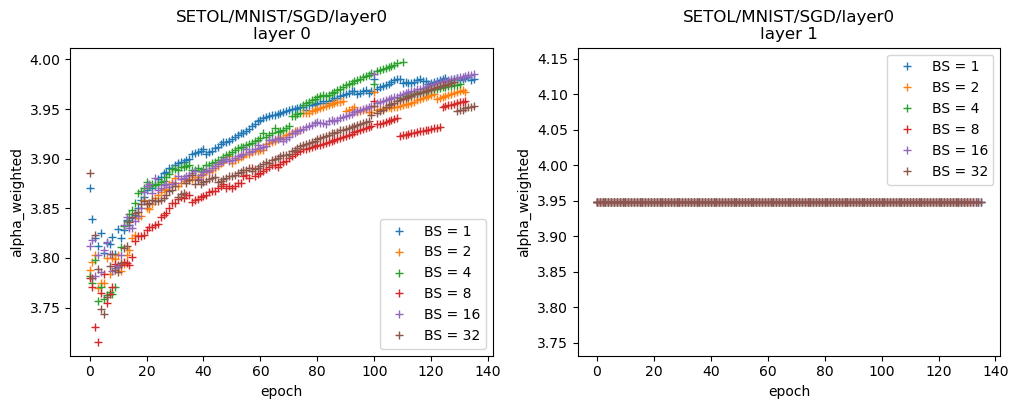

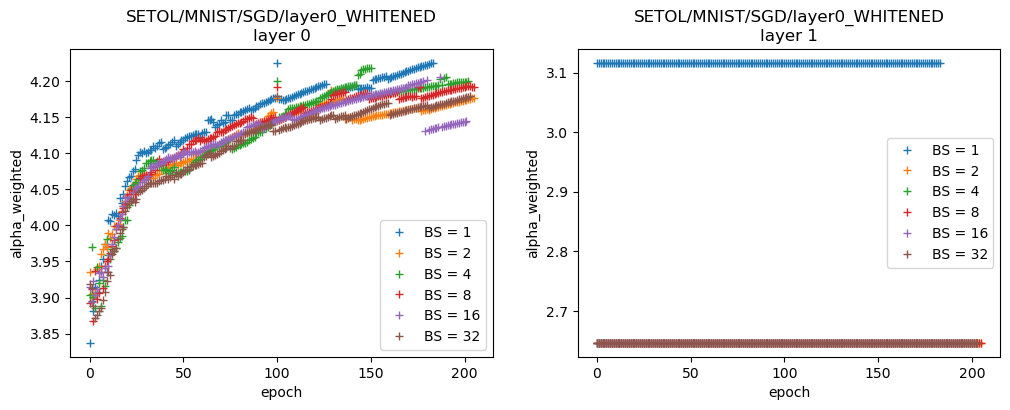

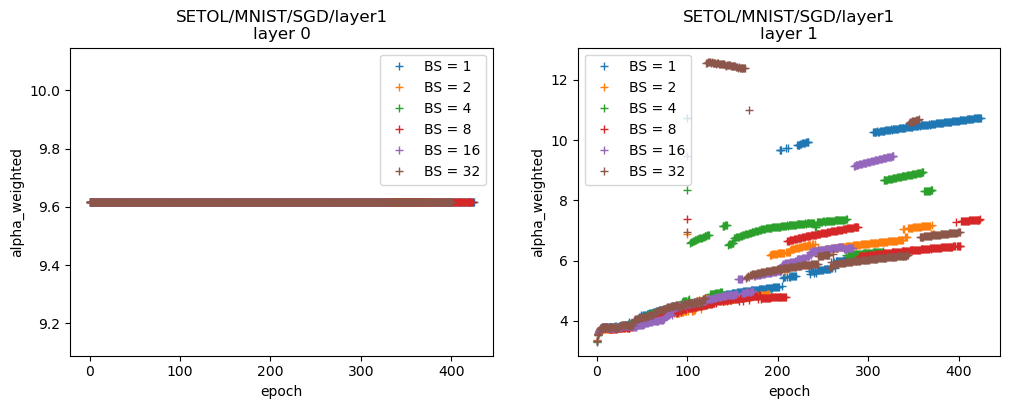

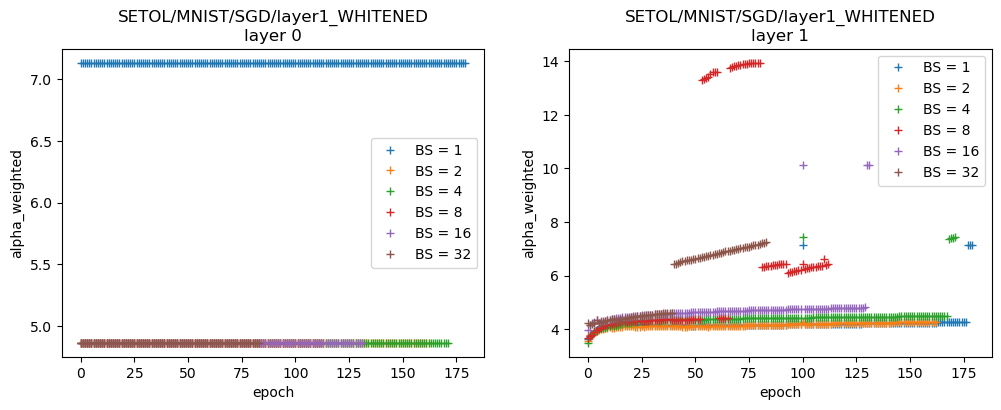

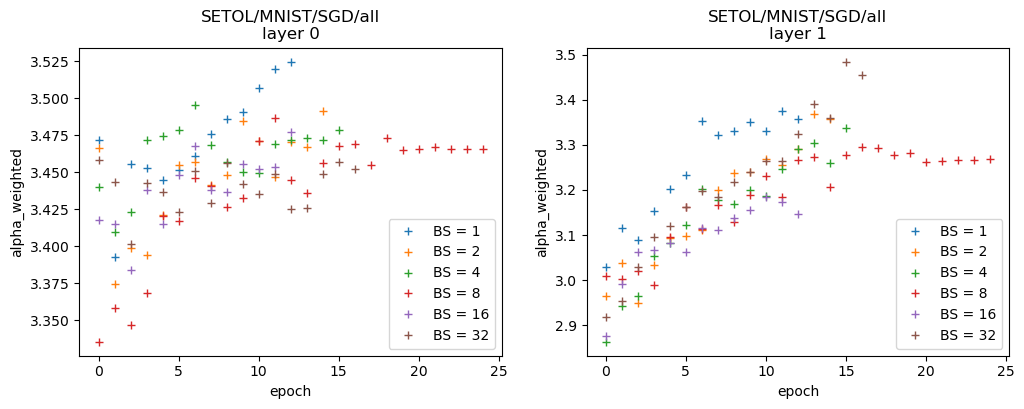

In [7]:
from importlib import reload
import plot_utils
reload(plot_utils)

from plot_utils import plot_over_epochs

ALL_BS = [1,2,4,8,16,32]
run_name = lambda r: f"BS = {ALL_BS[r]}"
WW_metric = "alpha_weighted"
opt = "SGD"
DS = "MNIST"
plot_over_epochs(f"SETOL/{DS}/{opt}/layer0",          range(6), run_name, WW_metric, [0, 1])
plot_over_epochs(f"SETOL/{DS}/{opt}/layer0_WHITENED", range(6), run_name, WW_metric, [0, 1])
plot_over_epochs(f"SETOL/{DS}/{opt}/layer1",          range(6), run_name, WW_metric, [0, 1])
plot_over_epochs(f"SETOL/{DS}/{opt}/layer1_WHITENED", range(6), run_name, WW_metric, [0, 1])
plot_over_epochs(f"SETOL/{DS}/{opt}/all",             range(6), run_name, WW_metric, [0, 1])

In [ ]:
def 

In [64]:
from utils import aggregate_DFs

ALL_BS = [1,2,4,8,16,32]
run_name = lambda run: ALL_BS[run]

aggregate_DFs("MNIST", "SGD", range(6), run_name).to_pickle("./saved_models/SETOL/MNIST/SGD/Aggregated_details_MNIST_SGD")
aggregate_DFs("MNIST", "ADAM", range(6), run_name).to_pickle("./saved_models/SETOL/MNIST/ADAM/Aggregated_details_MNIST_ADAM")

In [5]:
ALL_details_MNIST_SGD = pd.read_pickle("./saved_models/SETOL/MNIST/SGD/Aggregated_details_MNIST_SGD")
ALL_details_MNIST_SGD.columns

Index(['layer_id', 'name', 'D', 'M', 'N', 'Q', 'alpha', 'alpha_weighted',
       'bulk_mean_loc_ratio', 'bulk_mean_part_ratio', 'bulk_mean_vec_entropy',
       'bulk_var_loc_ratio', 'bulk_var_part_ratio', 'bulk_var_vec_entropy',
       'detX_num', 'detX_val', 'detX_val_unrescaled', 'entropy', 'has_esd',
       'lambda_max', 'layer_type', 'log_alpha_norm', 'log_norm',
       'log_spectral_norm', 'longname', 'matrix_rank', 'norm', 'num_evals',
       'num_pl_spikes', 'rank_loss', 'rf', 'sigma', 'spectral_norm',
       'stable_rank', 'status', 'sv_max', 'sv_min', 'tail_mean_loc_ratio',
       'tail_mean_part_ratio', 'tail_mean_vec_entropy', 'tail_var_loc_ratio',
       'tail_var_part_ratio', 'tail_var_vec_entropy', 'warning',
       'weak_rank_loss', 'xmax', 'xmin', 'trained_layer', 'batch_size',
       'epoch', 'train_acc', 'train_loss', 'test_acc', 'test_loss'],
      dtype='object')

In [45]:
def correlation_traps(DS, opt, runs, run_name, layers = None):
    m = MLP2(widths=(300, 100), H=28, W=28, C=1)
    t = Trainer(m)
    
    if layers is None: layers = [
        "layer0", "layer1", "all", "layer0_WHITENED", "layer1_WHITENED"
    ]
    
    
    DF = None
    for layer in layers:
        model_name = f"SETOL/{DS}/{opt}/{layer}"
        for run in runs:
            E = last_epoch(run, model_name)
            for epoch in range(E+1):
                t.load(run, epoch, model_name)
                details = WeightWatcher(m).analyze(randomize=True)
                
                details["trained_layer"] = layer
                details["batch_size"] = run_name(run)
                details["epoch"] = epoch

                if DF is None: DF = details
                else:          DF = DF.append(details)
            
    return DF

In [46]:
ALL_BS = [1,2,4,8,16,32]
run_name = lambda run: ALL_BS[run]

traps_MNIST_SGD = correlation_traps("MNIST", "SGD", range(6), run_name)
traps_MNIST_ADAM = correlation_traps("MNIST", "ADAM", range(6), run_name)

In [ ]:
traps_MNIST_SGD.to_pickle("./saved_models/SETOL/MNIST/SGD/Aggregated_MPrand_details_MNIST_SGD")
traps_MNIST_ADAM.to_pickle("./saved_models/SETOL/MNIST/ADAM/Aggregated_MPrand_details_MNIST_ADAM")

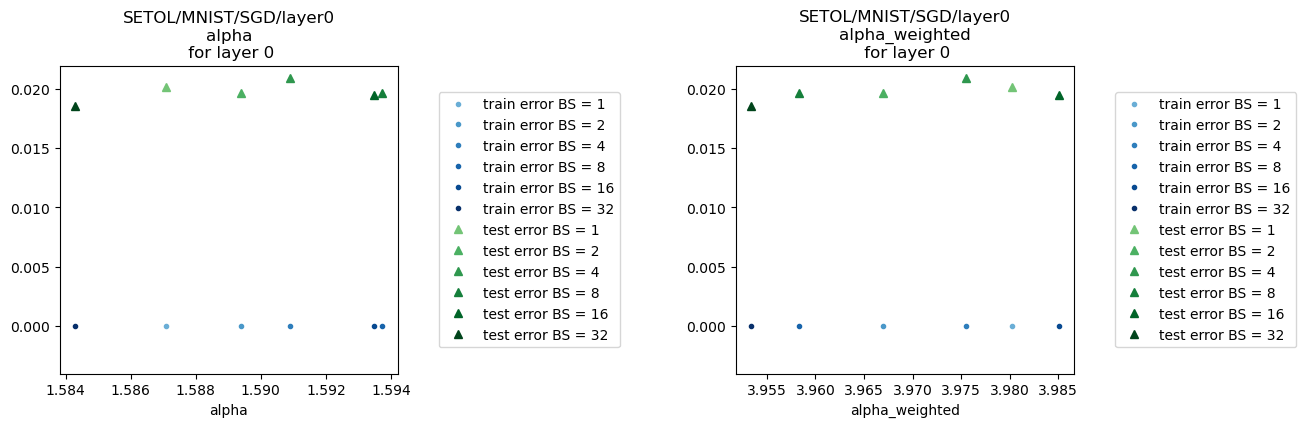

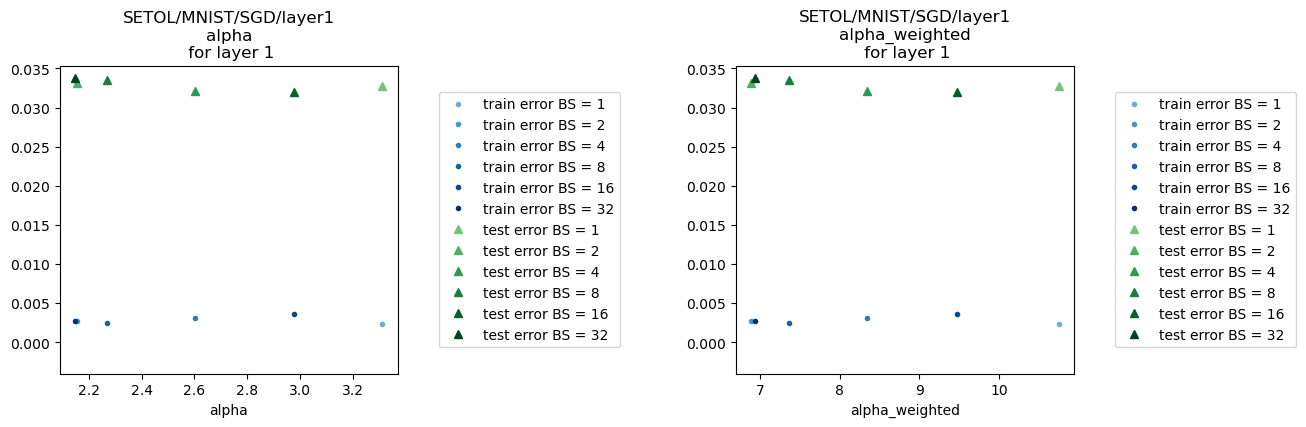

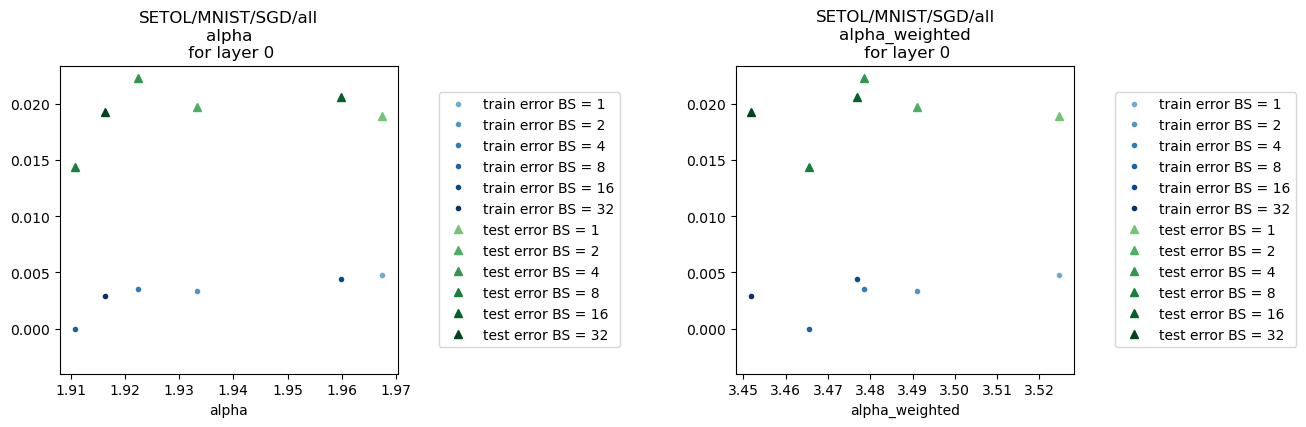

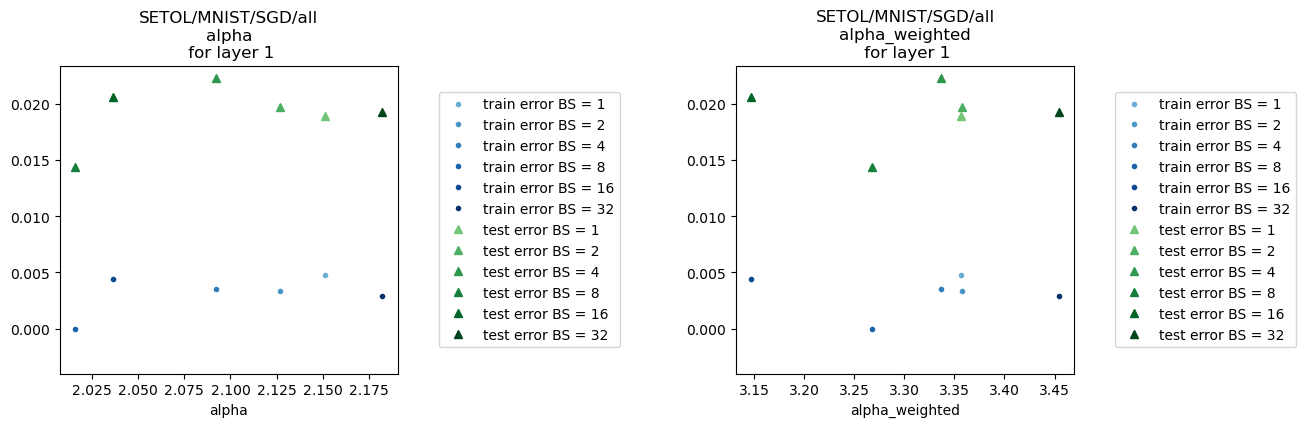

In [150]:
from plot_utils import plot_runs

ALL_BS = [1,2,4,8,16,32]

DS = "MNIST"
OPT = "SGD"

plot_runs(f"SETOL/{DS}/{OPT}/layer0", range(len(ALL_BS)), lambda r: f"BS = {ALL_BS[r]}",
          ["alpha", "alpha_weighted"],
          trained_layer = 0
         )

plot_runs(f"SETOL/{DS}/{OPT}/layer1", range(len(ALL_BS)), lambda r: f"BS = {ALL_BS[r]}",
          ["alpha", "alpha_weighted"],
          trained_layer = 1
         )

plot_runs(f"SETOL/{DS}/{OPT}/all", range(len(ALL_BS)), lambda r: f"BS = {ALL_BS[r]}",
          ["alpha", "alpha_weighted"],
          trained_layer = 0
         )

plot_runs(f"SETOL/{DS}/{OPT}/all", range(len(ALL_BS)), lambda r: f"BS = {ALL_BS[r]}",
          ["alpha", "alpha_weighted"],
          trained_layer = 1
         )

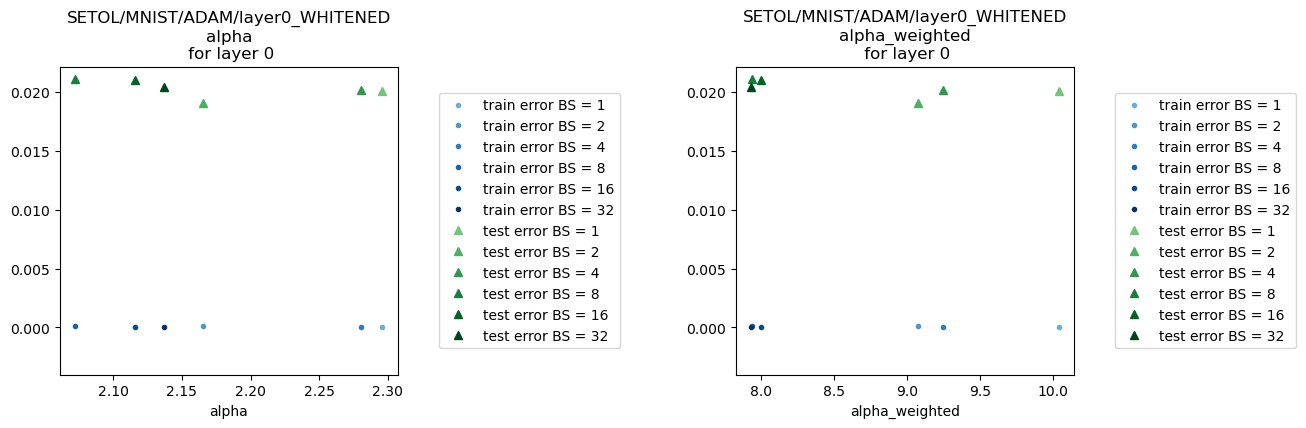

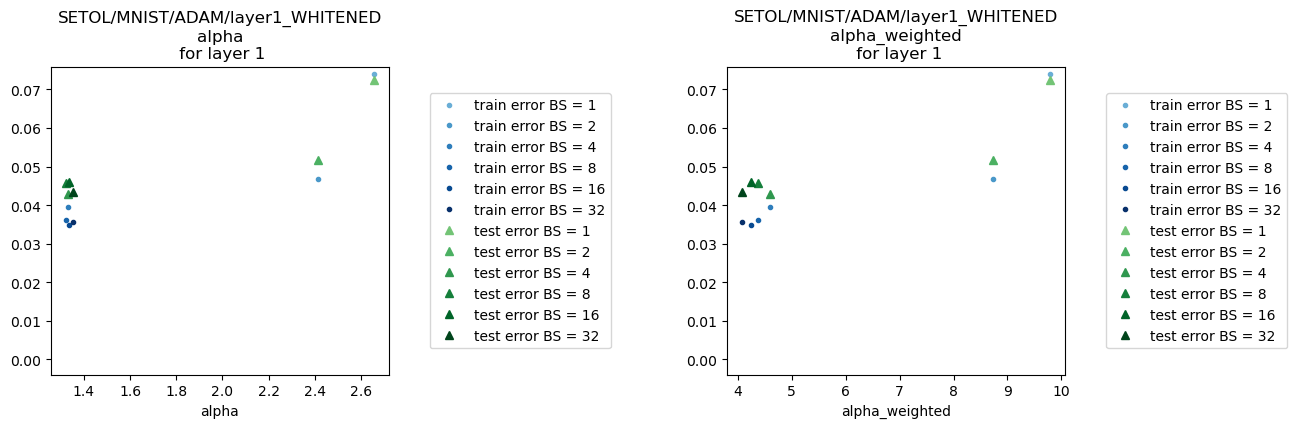

In [122]:
ALL_BS = [1,2,4,8,16,32]

DS = "MNIST"
OPT = "ADAM"

plot_runs(f"SETOL/{DS}/{OPT}/layer0_WHITENED", range(len(ALL_BS)), lambda r: f"BS = {ALL_BS[r]}",
          ["alpha", "alpha_weighted"],
          trained_layer = 0
         )

plot_runs(f"SETOL/{DS}/{OPT}/layer1_WHITENED", range(len(ALL_BS)), lambda r: f"BS = {ALL_BS[r]}",
          ["alpha", "alpha_weighted"],
          trained_layer = 1
         )

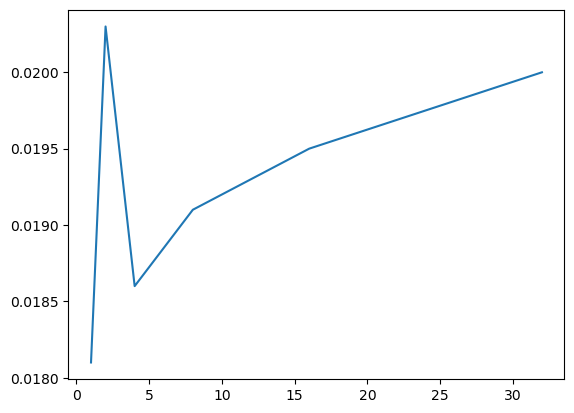

In [10]:
ALL_BS = [1,2,4,8,16,32]

runs = range(6)

DS = "MNIST"
OPT = "SGD"
model_name = f"SETOL/{DS}/{OPT}/layer0_WHITENED"
for run in range(6):
    all_metrics = [ Trainer.load_metrics(run, model_name) for run in runs]
def get_last():
    for i, run in enumerate(runs):
        train_acc, train_loss, test_acc, test_loss = all_metrics[i]
        E = last_epoch(run, model_name)
        # last_epoch = np.argmax(test_acc)
        all_metrics[i] = (1 - train_acc[E], train_loss[E], 1 - test_acc[E], test_loss[E])

        yield Trainer.load_details(run, E, model_name)
        
all_details = list(get_last())
train_err, train_loss, test_err, test_loss = tuple(zip(*all_metrics))

plt.plot(ALL_BS, np.asarray(test_err))

In [172]:
details = Trainer.load_details(0, 100, "SETOL/MNIST/SGD/layer0")
metric = "alpha"
details.loc[1, metric]

4.16822606592762

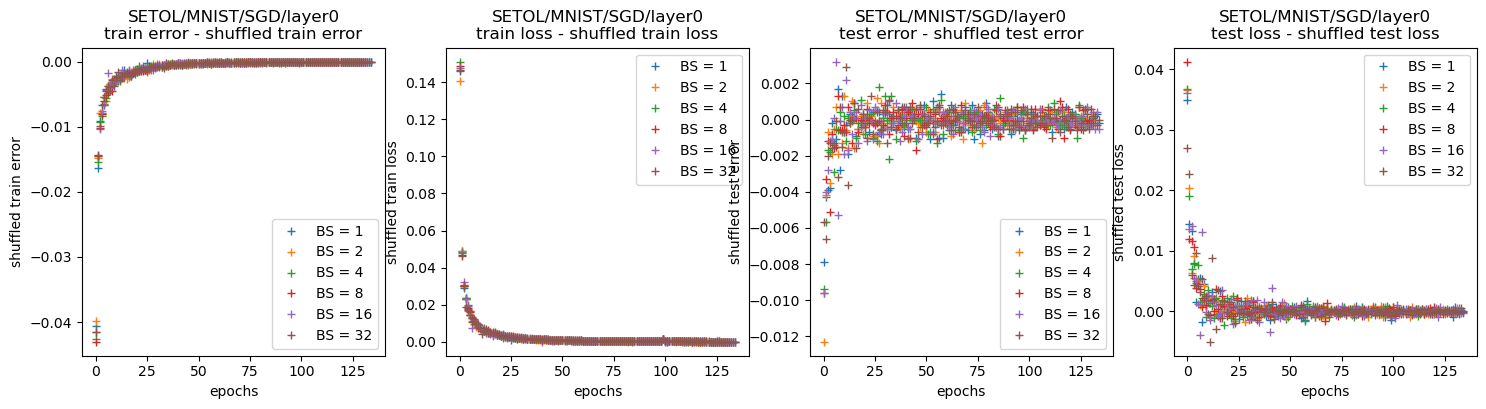

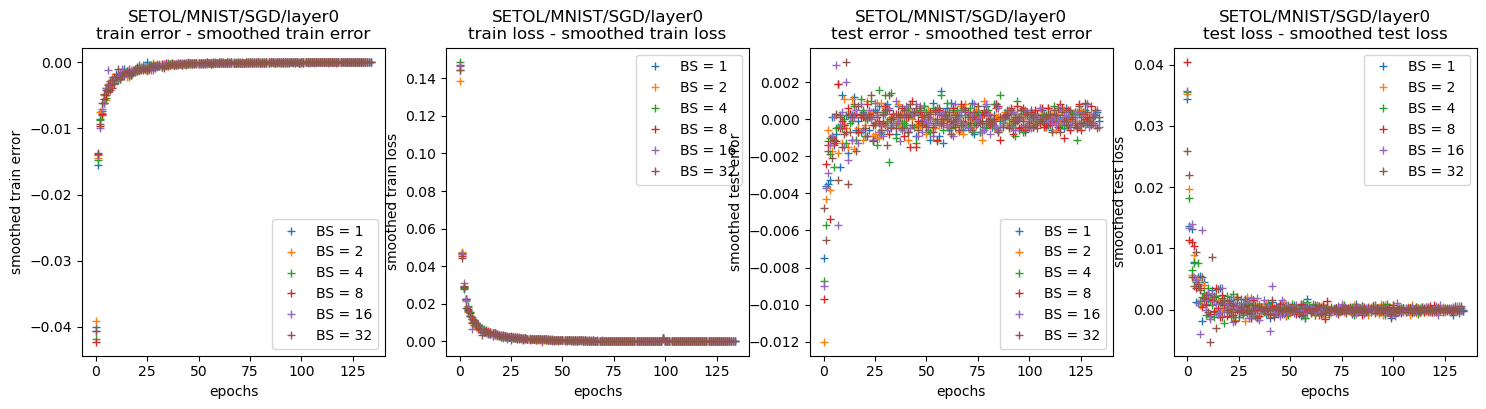

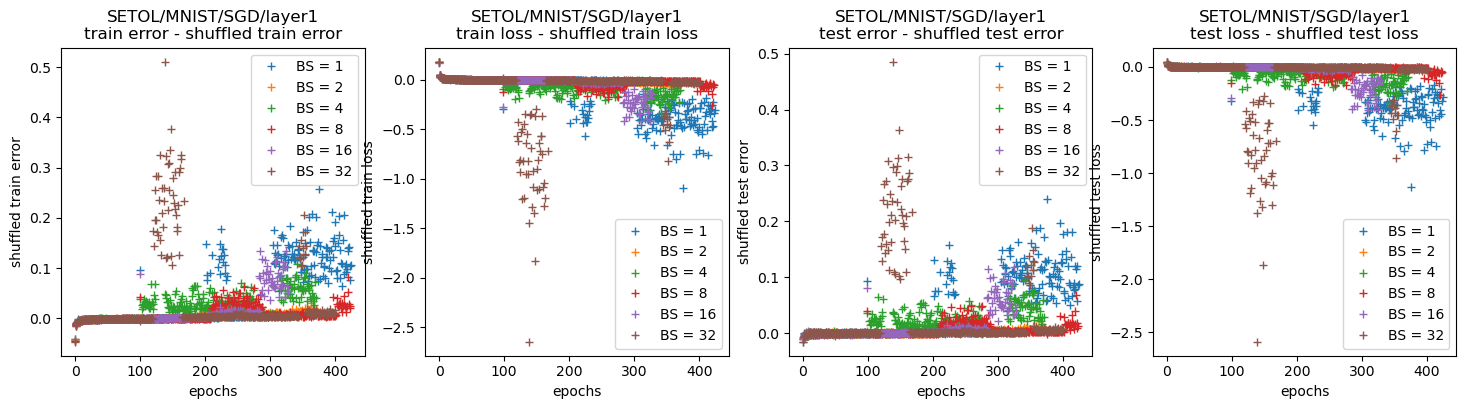

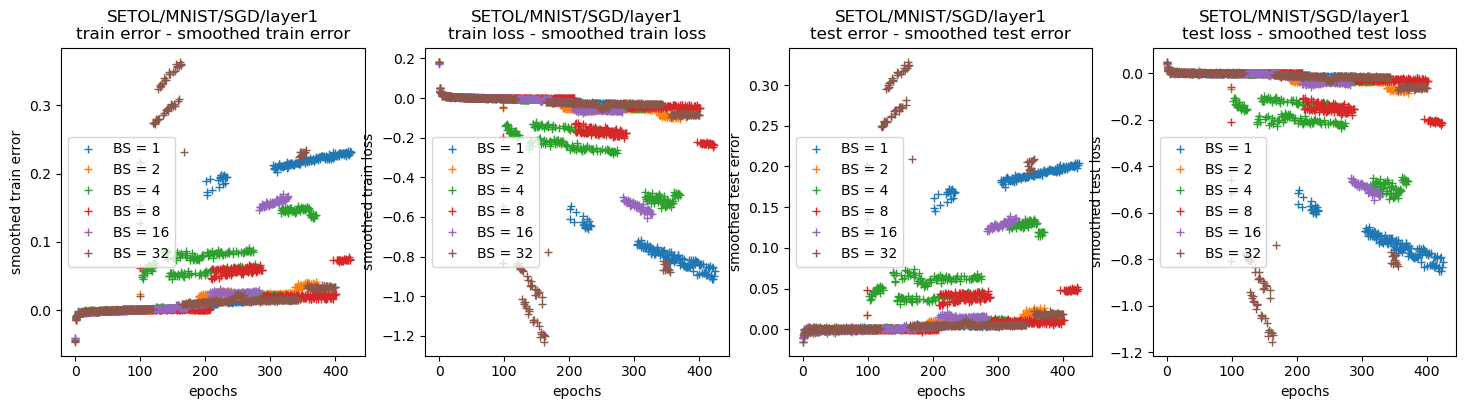

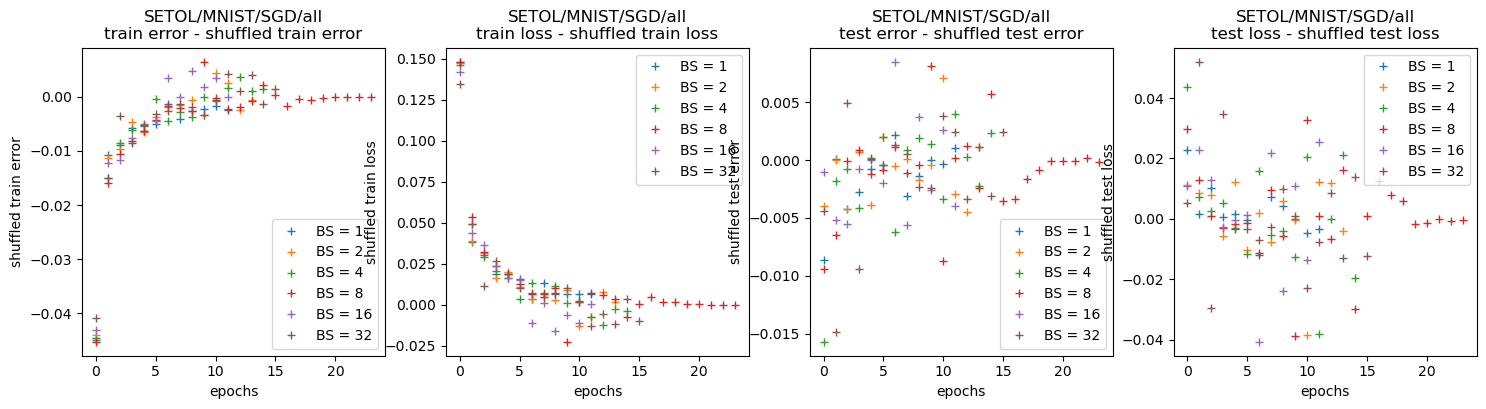

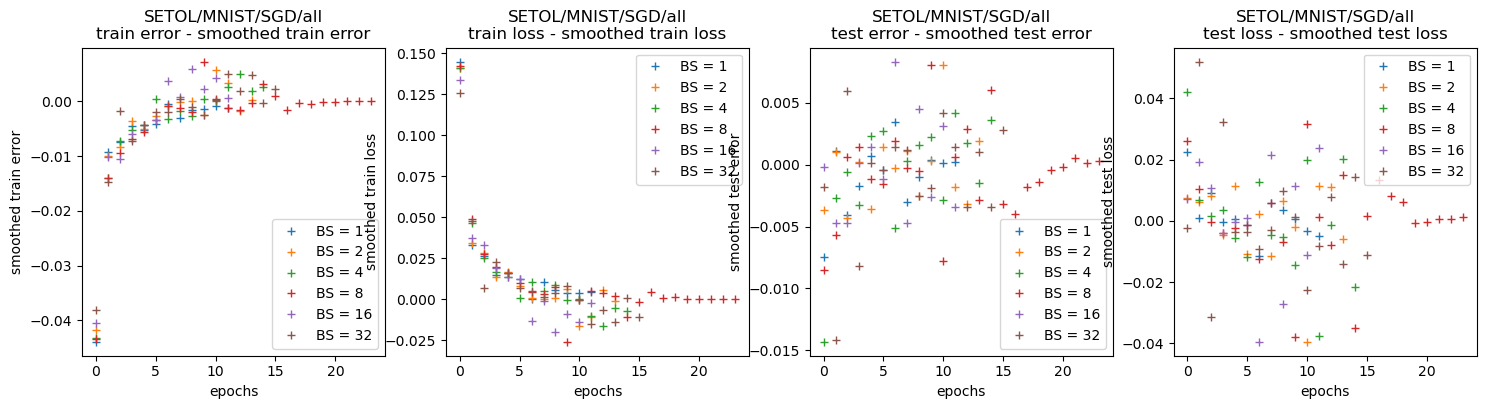

In [13]:
from importlib import reload
import plot_utils
reload(plot_utils)

from plot_utils import plot_shuffled_accuracy

ALL_BS = [1,2,4,8,16,32]
run_name = lambda r: f"BS = {ALL_BS[r]}"
plot_shuffled_accuracy("MNIST", "SGD", "layer0", [1, 0, 0], range(6), run_name, True)
plot_shuffled_accuracy("MNIST", "SGD", "layer0", [1, 0, 0], range(6), run_name, False)
plot_shuffled_accuracy("MNIST", "SGD", "layer1", [1, 0, 0], range(6), run_name, True)
plot_shuffled_accuracy("MNIST", "SGD", "layer1", [1, 0, 0], range(6), run_name, False)
plot_shuffled_accuracy("MNIST", "SGD", "all", [1, 0, 0], range(6), run_name, True)
plot_shuffled_accuracy("MNIST", "SGD", "all", [1, 0, 0], range(6), run_name, False)

In [110]:
last_epoch(0, "SETOL/MNIST/SGD/layer0")

136

In [163]:
TRAIN = PILDataSet(True,  DS="MNIST")
TEST  = PILDataSet(False, DS="MNIST")

m = MLP2(widths=(300, 100), H=28, W=28, C=1)
t = Trainer(m)

ALL_BS = [1,2,4,8,16,32]
for run, BS in enumerate(ALL_BS):
    loader = PreLoader("MNIST", TRAIN, TEST, batch_size=BS)
    
    if run > 0:
        t.load(0, 0, "SETOL/MNIST/SGD/layer0")  # Start with the same initial weights
        
    
    t.train_loop("SETOL/MNIST/SGD/layer0", run, 100, loader, LR=[0.01, 0, 0], loss="CCE", early_stop=EarlyStopper(3, 0.0001))
    
    best_epoch = np.argmax(t.test_acc)
    t.details = t.load_details(run, best_epoch, "SETOL/MNIST/SGD/layer0")
    t.save(run, 101, "SETOL/MNIST/SGD/layer0")
    
    print(f"Batch size {BS} best epoch {best_epoch}")
    print(t.details)
    print()
    
    
    t.load(0, 0, "SETOL/MNIST/SGD/layer1")  # Start with the same initial weights
    t.train_loop("SETOL/MNIST/SGD/layer1", run, 100, loader, LR=[0, 0.01, 0], loss="CCE", early_stop=EarlyStopper(3, 0.0001))
    
    best_epoch = np.argmax(t.test_acc)
    t.details = t.load_details(run, best_epoch, "SETOL/MNIST/SGD/layer1")
    t.save(run, 101, "SETOL/MNIST/SGD/layer1")
    
    print(f"Batch size {BS} best epoch {best_epoch}")
    print(t.details)
    print()

KeyboardInterrupt: 

In [8]:
TRAIN = PILDataSet(True,  DS="MNIST")
TEST  = PILDataSet(False, DS="MNIST")

m = MLP2(widths=(300, 100), H=28, W=28, C=1)
t = Trainer(m)

ALL_BS = [1,2,4,8,16,32]
for run, BS in enumerate(ALL_BS):
    early_stop = EarlyStopper(3, 0.0001)
    
    t.load(0, 0, "SETOL/MNIST/SGD")  # Start with the same initial weights
    loader = PreLoader("MNIST/ADAM", TRAIN, TEST, batch_size=BS)
    t.train_loop("SETOL/MNIST/ADAM", run, 100, loader, LR=[0.01, 0, 0],
                 opt="ADAM",
                 loss="CCE", early_stop=early_stop)
    
    best_epoch = np.argmax(t.test_acc)
    t.details = t.load_details(run, best_epoch, "SETOL/MNIST/ADAM")
    t.save(run, 101, "SETOL/MNIST/ADAM")
    
    print(f"Batch size {BS} best epoch {best_epoch}")
    print(t.details)
    print()

KeyboardInterrupt: 

In [ ]:
from pdb import pm
pm()

In [15]:
TRAIN = PILDataSet(True,  DS="FASHION")
TEST  = PILDataSet(False, DS="FASHION")

ALL_BS = [1,2,4,8,16,32]
for run, BS in enumerate(ALL_BS):
    m_fm = MLP2(widths=(300, 100), H=28, W=28, C=1)
    t = Trainer(m_fm)

    early_stop = EarlyStopper(3, 0.0001)
    
    t.load(0, 0, "SETOL/MNIST/SGD")  # Start with the same initial weights
    loader = PreLoader("FASHION", TRAIN, TEST, batch_size=BS)
    t.train_loop("SETOL/FASHION/SGD", run, 100, loader, LR=[0.01, 0, 0], loss="CCE", early_stop=early_stop)
    
    t.details = t.load_details(run, np.argmax(t.test_acc), "SETOL/FASHION/SGD")
    print(f"Batch size {BS} FASHION MNIST")
    print(t.details)
    print()
    
    t.save(run, 101, "SETOL/FASHION/SGD")

SETOL run 20 epoch 1 loss 0.5126 train accuracy 0.8217 test accuracy 0.8179 124.50
	 alpha 1 2.643	 alpha 2 14.415
SETOL run 20 epoch 2 loss 0.3994 train accuracy 0.8596 test accuracy 0.8351 125.88
	 alpha 1 2.371	 alpha 2 14.415
SETOL run 20 epoch 3 loss 0.3638 train accuracy 0.8704 test accuracy 0.8564 124.45
	 alpha 1 2.208	 alpha 2 14.415
SETOL run 20 epoch 4 loss 0.3409 train accuracy 0.8776 test accuracy 0.8620 114.44
	 alpha 1 2.179	 alpha 2 14.415
SETOL run 20 epoch 5 loss 0.3246 train accuracy 0.8829 test accuracy 0.8650 114.54
	 alpha 1 2.093	 alpha 2 14.415
SETOL run 20 epoch 6 loss 0.3114 train accuracy 0.8871 test accuracy 0.8608 115.99
	 alpha 1 2.045	 alpha 2 14.415
SETOL run 20 epoch 7 loss 0.3021 train accuracy 0.8907 test accuracy 0.8744 125.77
	 alpha 1 2.012	 alpha 2 14.415
SETOL run 20 epoch 8 loss 0.2924 train accuracy 0.8936 test accuracy 0.8669 122.81
	 alpha 1 1.977	 alpha 2 14.415
SETOL run 20 epoch 9 loss 0.2833 train accuracy 0.8974 test accuracy 0.8556 120.

KeyboardInterrupt: 

In [ ]:
m = MLP2(widths=(300, 100), H=28, W=28, C=1)
t = Trainer(m)

ALL_BS = [1,2,4,8,16,32]
for _run, BS in enumerate(ALL_BS):
    run = _run + 10
    t.load(0, 0, "SETOL")
    best_epoch = np.argmax(t.test_acc)
    details = t.load_details(run, best_epoch, "SETOL")
    print(best_epoch)
    print(details.alpha)